In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.constants import epsilon_0
import matplotlib.pyplot as plt

Question 1 and 2

Note that I used the integrator I made for Q2 in Q1. 

In [2]:
def efficient_integrate(f, a, b, eps, extra = np.array(None)):

#During the first iteration extra is empty thus needs 
#to be initialized
    if not extra.all():
        fa, fb, mid = f(a), f(b), (b+a)/2
        fmid = f(mid)
        Sim = np.abs(b-a)/ 6 * (fa + 4 * fmid + fb)
        extra = np.array([fa, fb, Sim, mid, fmid ])

    
#The information from the prvious iteration is stored in extra 
#Here we assign variable with their values
    fa = extra[0]
    fb = extra[1]
    Sim = extra[2]
    mid = extra[3]
    fmid = extra[4]

#Computing the point between a and mid
#and evalutaing the function at this point
    l_mid = (mid+a)/2
    fl_mid = f(l_mid)
#Similarly betwenn mid and b 
    r_mid = (b+mid)/2
    fr_mid = f(r_mid)

#Simpson's rule from [a,mid]
    Sleft = np.abs(mid-a)/6 * (fa + 4*fl_mid + fmid)
#Simpson's rule from [mid,b]
    Sright = np.abs(b-mid)/6*(fmid + 4*fr_mid + fb)

    delta = Sleft+Sright-Sim

    if np.abs(delta) < 15*eps:
        return (Sleft + Sright + delta / 15)
    else:
        return efficient_integrate(f, a, mid, eps/2, extra=np.array([fa,fmid,Sleft,l_mid,fl_mid])) +\
            efficient_integrate(f, mid, b, eps/2, extra=np.array([fmid,fb,Sright,r_mid,fr_mid]))

In [3]:
#Here I define the integrand as described in Griffiths
def dEz_dtheta(theta,z):
    eps = 1
    sigma = 1
    R = 10
    coeff = (1/(4*np.pi*eps))*(2*np.pi*R**2*sigma)
    integrand = ((z-R*np.cos(theta))*np.sin(theta))/(R**2 + z**2 - 2*R*z*np.cos(theta))**(3/2)

    return coeff*integrand

In [4]:
z = np.linspace(0,20,1000)
Ez_mine = np.zeros(len(z))
Ez_quad = np.zeros(len(z))

for i in  range(len(z)):
    def func(theta):
        return dEz_dtheta(theta, z[i])

    Ez_mine[i] += efficient_integrate(func,0,np.pi,1e-6)
    Ez_quad[i] += quad(func,0,np.pi)[0]

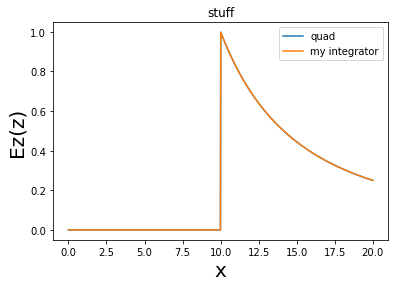

In [5]:
plt.plot(z,Ez_quad, label = "quad")
plt.plot(z,Ez_mine, label = "my integrator")

plt.ylabel("Ez(z)", fontsize="20")
plt.xlabel("x", fontsize="20")
plt.title("stuff")
plt.legend()

Question 3

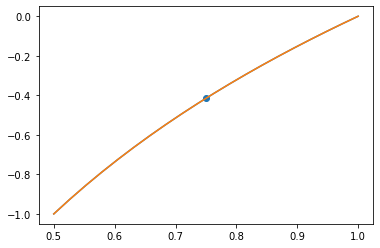

In [6]:

n=20
x=np.linspace(-1,1,n)
mat=np.polynomial.chebyshev.chebvander(x,n-1)
fun=np.log2
xx = np.linspace(0.5,1,n)
y=fun(xx)
fitp=np.linalg.inv(mat)@y
fitp_use=fitp.copy()
nuse=6
fitp_use[nuse:]=0 #zero out all coefficients pass the ones we want
pred=mat@fitp_use

def range_mapping(x):
    return 0.25*x+0.75

plt.plot(xx,pred)
plt.plot(xx, y)
test = 0
plt.scatter(range_mapping(test), np.polynomial.chebyshev.chebvander(test,n-1)@fitp_use)


Text(0, 0.5, 'RMS')

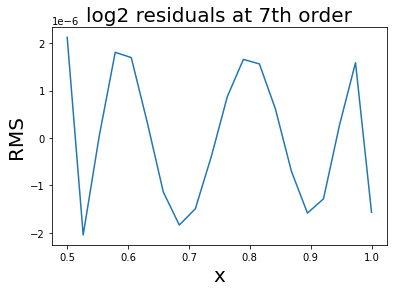

In [7]:
n=20
x=np.linspace(-1,1,n)
mat=np.polynomial.chebyshev.chebvander(x,n-1)
fun=np.log2
xx = np.linspace(0.5,1,n)
y=fun(xx)
fitp=np.linalg.inv(mat)@y
fitp_use=fitp.copy()
nuse=7
fitp_use[nuse:]=0 #zero out all coefficients pass the ones we want
pred=mat@fitp_use

plt.plot(xx,pred-y)
plt.title("log2 residuals at 7th order", fontsize="20")
plt.xlabel("x", fontsize="20")
plt.ylabel("RMS", fontsize="20")




Text(0, 0.5, 'RMS')

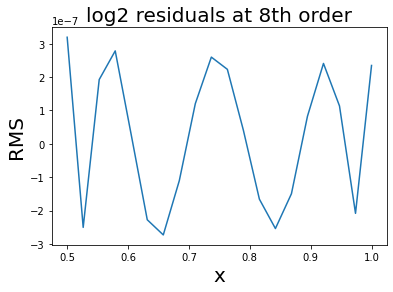

In [8]:
n=20
x=np.linspace(-1,1,n)
mat=np.polynomial.chebyshev.chebvander(x,n-1)
fun=np.log2
xx = np.linspace(0.5,1,n)
y=fun(xx)
fitp=np.linalg.inv(mat)@y
fitp_use=fitp.copy()
nuse=8
fitp_use[nuse:]=0 #zero out all coefficients pass the ones we want
pred=mat@fitp_use

plt.plot(xx,pred-y)
plt.title("log2 residuals at 8th order", fontsize="20")
plt.xlabel("x", fontsize="20")
plt.ylabel("RMS", fontsize="20")

In [9]:
fitp_use

array([-4.56893394e-01,  4.95054673e-01, -4.24689768e-02,  4.85768297e-03,
       -6.25084976e-04,  8.57981012e-05, -1.22671891e-05,  1.80404306e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [10]:
def mylog2(x):
   M, E = np.frexp(x)
   x_cheb_space = 4*M-3
   fitp_use = np.array([-4.56893394e-01,  4.95054673e-01, -4.24689768e-02,  4.85768297e-03,
       -6.25084976e-04,  8.57981012e-05, -1.22671891e-05, 1.80404306e-06])
   mat=np.polynomial.chebyshev.chebvander(x_cheb_space,7)
   return ((mat@fitp_use + E)/1.4426950408889634) #dividing by log_2(e) to make to get the natural log 


Text(0.5, 0, 'x')

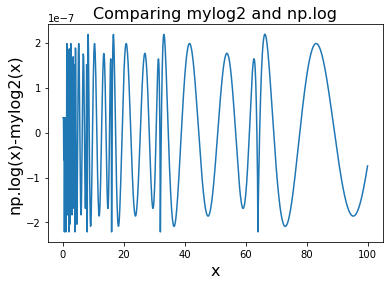

In [11]:
xx= np.linspace(0.1,100,1000)
y = np.log(xx)-mylog2(xx)
plt.plot(xx,y)

plt.title("Comparing mylog2 and np.log", fontsize=16)
plt.ylabel("np.log(x)-mylog2(x)", fontsize=16)
plt.xlabel("x", fontsize = "16")